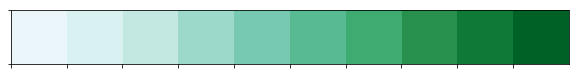

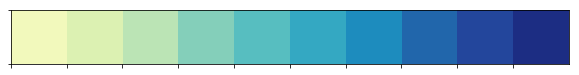

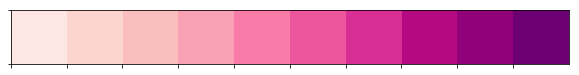

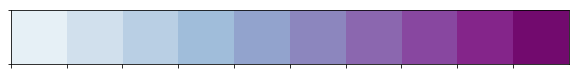

In [25]:
# Import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
plt.rcParams["figure.figsize"] = [10,5]
# Create color palettes for seaborn
sns.palplot(sns.color_palette("BuGn", 10))
sns.palplot(sns.color_palette("YlGnBu", 10))
RdPu = ['#fff7f3','#fde0dd','#fcc5c0','#fa9fb5','#f768a1','#dd3497','#ae017e','#7a0177','#49006a']
sns.palplot(sns.color_palette("RdPu", 10))
BuPu = ['#f7fcfd','#e0ecf4','#bfd3e6','#9ebcda','#8c96c6','#8c6bb1','#88419d','#810f7c','#4d004b']
sns.palplot(sns.color_palette("BuPu", 10))

In [6]:
# Import data
puzzle = "puzzle.csv"

In [9]:
# Crate dataframe
puzzle_df = pd.read_csv(puzzle, header = None, names = ["A", "B"])

In [10]:
# Explore df
puzzle_df.head(15)

,A,B
0,0.397150,2.113629
1,0.397150,2.113629
2,0.397150,2.113629
3,0.397150,2.113629
4,0.397150,2.113629
5,0.397150,2.113629
6,0.397150,2.113629
7,0.397150,2.113629
8,0.967562,-0.099246
9,0.061841,-1.333110


In [11]:
puzzle_df.describe()

,A,B
count,1024.000000,1024.000000
mean,0.504729,-0.388165
std,0.355107,1.499346
min,-0.925070,-2.837888
25%,0.389721,-1.559228
50%,0.591392,-1.129903
75%,0.746583,0.578621
max,1.195399,3.096964


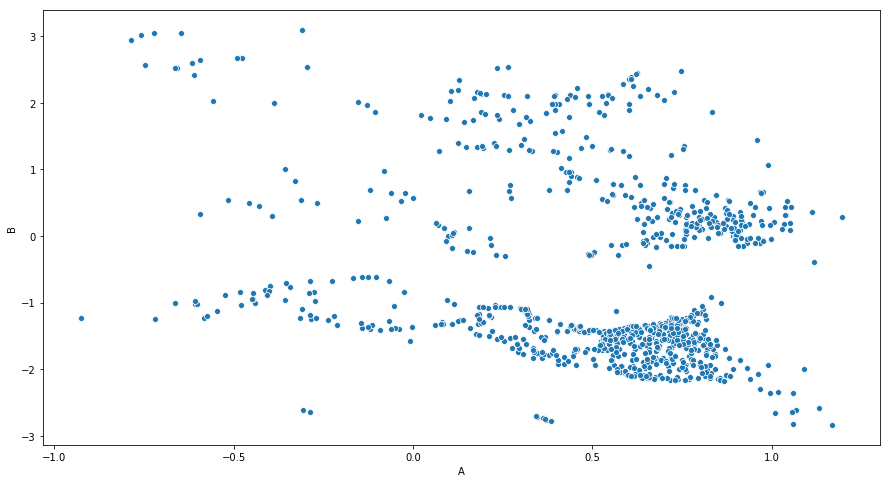

In [22]:
# Plot with x as A and y as B
plt.figure(figsize = (15, 8))
sns.scatterplot(x = puzzle_df["A"], y = puzzle_df["B"], data = puzzle_df)
plt.show()

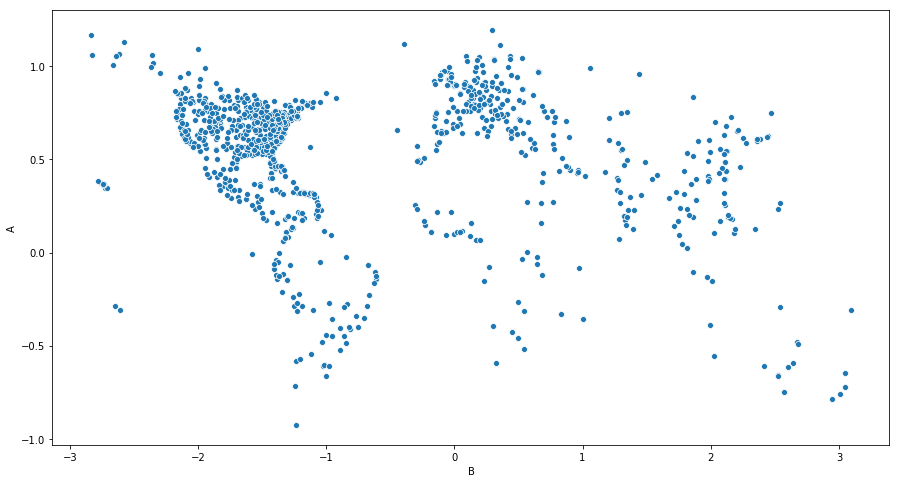

In [23]:
# Plot with x as B and y as A
plt.figure(figsize = (15, 8))
sns.scatterplot(x = puzzle_df["B"], y = puzzle_df["A"], data = puzzle_df)
plt.show()

So, this looks like a Mercator projection of the world. 

If that is in fact the case, then the point must be some kind of coordinates.

Latitude ranges from -90 to 90 degrees, and Longitude ranges from -180 to 180 degrees. Since the minimum and maximum for both column A and column B are close to zero, it would be safe to assume that these coordinates are not expressed in degrees.

Exploring the Polar coordinate system: since the minimum for column B is less than zero, the coordinates are not expressed using the Polar coordinate, because in the polar coordinates (r,θ) of a point P, r ranges from 0 to infinity and θ ranges from 0 to 2π. But the angle θ can be expressed in both degrees or radians. 

### What if both numbers are expressed in radians?

Let's try it out with a point we know. 

The southernmost city on Earth is Ushuaia, with latitude and longitude (-54.8000000°, -68.3000000°). Since it is the southernmost point, it would also be the minimum for column A (-0.925070), now let's find it's corresponding B, and convert it from radians to degrees.

In [27]:
# Let's find Ushuaia in our data set
# Locate minimum value for column A

ushuaia = puzzle_df.loc[puzzle_df["A"].idxmin()]

In [26]:
# Define a function that takes radians and converts it to degrees
def radians_to_degrees(radians):
    pi = math.pi
    degrees = (radians * 180) / pi
    return degrees

In [29]:
# Convert Ushuaia from radians to degrees
# Check against Ushuaia's coordinates

latitude = radians_to_degrees(ushuaia.A)
longitude = radians_to_degrees(ushuaia.B)

print(f"Latitude: {latitude}, Longitude: {longitude}")

Latitude: -53.00260102458912, Longitude: -70.8545965517352


### It CAN'T be a coincidence, it's too close!!

Since this is Hopper's data, maybe it's the airport!

Ushuaia's Airport coordinates (-54.843333, -68.294444).

### Let's try converting both columns from Radians to Degrees, and then comparing that to coordinates of cities and airports